In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
folder_path = './npy_file'  # 폴더 경로

file_names = os.listdir(folder_path)  # 폴더 내의 파일 이름 목록

data = []
for file_name in file_names:
    if file_name.endswith('.npy'):
        file_path = os.path.join(folder_path, file_name)  # 파일 경로
        array = np.load(file_path)  # npy 파일 읽기
        data.append(array)

df = pd.DataFrame(data)  # DataFrame 생성
df

,0,1,2,3,4,5,6,7,8,9,...,754,755,756,757,758,759,760,761,762,763
0,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,...,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309
1,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,...,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309
2,0.001310,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,...,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308
3,0.001403,0.001312,0.001311,0.001311,0.001312,0.001312,0.001311,0.001312,0.001312,0.001312,...,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308
4,0.001313,0.001313,0.001313,0.001313,0.001313,0.001313,0.001313,0.001313,0.001313,0.001313,...,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308
5,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,...,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309
6,0.001309,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,0.001310,...,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308
7,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,0.001308,...,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309,0.001309


In [108]:
df.iloc[6].values[174]

0.0013079919

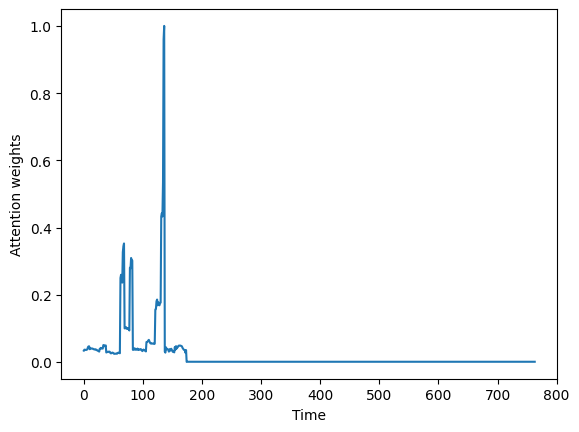

In [98]:
i=6
time_steps = np.arange(len(df.iloc[i].values))
min_value = np.min(df.iloc[i].values)
max_value = np.max(df.iloc[i].values)
scaled_values = (df.iloc[i].values - min_value) / (max_value - min_value)  # 스케일링
plt.plot(time_steps, scaled_values)
# Plot the attention weights as a bar graph
# plt.bar(time_steps, df.iloc[i].values)
plt.xlabel('Time')
plt.ylabel('Attention weights')

plt.show()

In [84]:
def max_sum_subarray(arr, window_size):
    # Number of elements in array
    n = len(arr)
    
    # If window size is larger than array size
    if (window_size > n):
        return "Invalid: Window size is larger than array size."
    
    # Compute the initial window sum
    window_sum = sum([arr[i] for i in range(window_size)])
    max_sum = window_sum
    max_start = 0
    
    # Slide the window
    for i in range(n - window_size):
        window_sum = window_sum - arr[i] + arr[i + window_size]
        
        # Update the maximum sum and the starting index of max_sum
        if window_sum > max_sum:
            max_sum = window_sum
            max_start = i + 1
    
    return (max_start, max_start + window_size, max_sum,arr)

In [121]:
def max_sum_pattern_pad(arr, window_size):
    # Number of elements in array
    n1 = 174
    
    # If window size is larger than array size
    if (window_size > n1):
        pad_size = window_size - n1
        mini_window_size = pad_size
        mini_start, _, mini_sum,_ = max_sum_subarray(arr[:n1], mini_window_size)
        # arr = np.pad(arr, (0, pad_size), 'constant', constant_values=(0))
        arr[n1:n1+pad_size] = arr[mini_start:mini_start+pad_size]
        n = len(arr)
#     # Compute the initial window sum
#     window_sum = sum([arr[i] for i in range(window_size)])
#     max_sum = window_sum
#     max_start = 0
    
#     # Slide the window
#     for i in range(n - window_size):
#         window_sum = window_sum - arr[i] + arr[i + window_size]
        
#         # Update the maximum sum and the starting index of max_sum
#         if window_sum > max_sum:
#             max_sum = window_sum
#             max_start = i + 1
    
    return (mini_start,mini_start+pad_size,arr,n1)

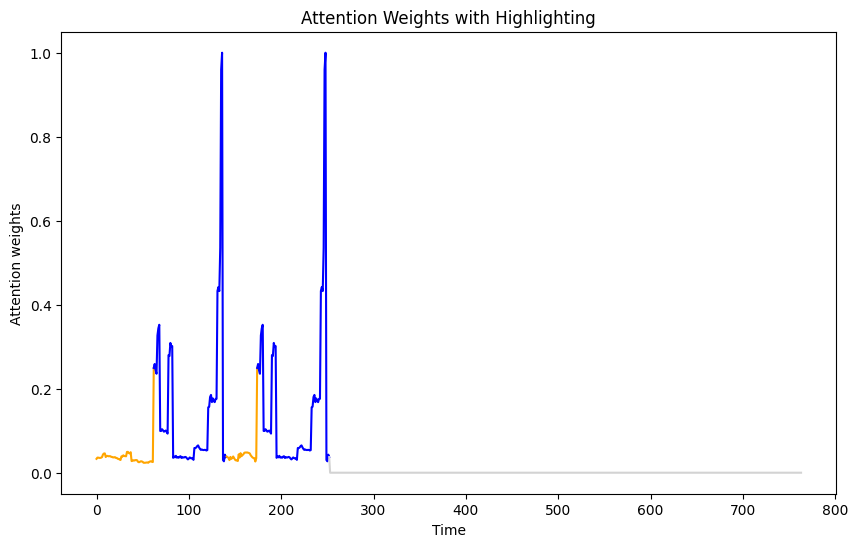

In [138]:
# Window size
window_size = 253
start,end,arr,n1 = max_sum_pattern_pad(df.iloc[i].values, window_size)

# Create an array of time steps
time_steps = np.arange(len(df.iloc[i].values))
# Plot the attention weights as a bar graph
plt.figure(figsize=(10,6))
min_value = np.min(df.iloc[i].values)
max_value = np.max(df.iloc[i].values)
scaled_values = (df.iloc[i].values - min_value) / (max_value - min_value)  # 스케일링
plt.plot(time_steps[:start+1], scaled_values[:start+1], color='orange')
plt.plot(time_steps[start:end],scaled_values[start:end],color='blue')
plt.plot(time_steps[end:n1+1], scaled_values[end:n1+1], color='orange')
plt.plot(time_steps[n1:window_size],scaled_values[n1:window_size],color='blue')
plt.plot(time_steps[window_size-1:], scaled_values[window_size-1:], color='lightgray')

plt.xlabel('Time')
plt.ylabel('Attention weights')
plt.title('Attention Weights with Highlighting')

plt.show()